In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import plot_windrose

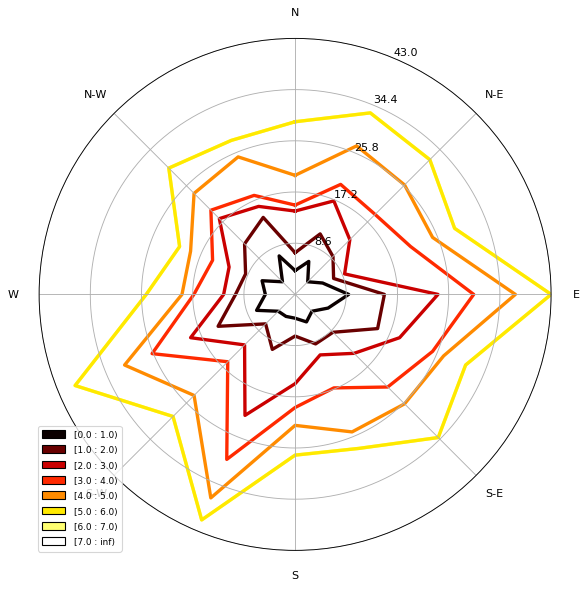

In [3]:
N = 500
ws = np.random.random(N)*6
wd = np.random.random(N)*360
df = pd.DataFrame({'speed':ws, 'direction':wd})
plot_windrose(df, kind='contour', bins=np.arange(0.01, 8, 1), cmap=cm.hot, lw=3, )

In [43]:
filename = 'data/Fresno/WINSPD_PICKDATA_2014-12-31.csv'
df1 = pd.read_csv(filename, parse_dates=[1])
df1.dropna(subset=['value'], inplace=True)
df1.date = pd.to_datetime(df1.date, format="%Y-%m-%d")
df1.index = df1.date
df1.sort_index(inplace=True)
df1.value.head()

date
2014-01-01         CALM
2014-01-01         CALM
2014-01-01         CALM
2014-01-01     075/00.6
2014-01-01         CALM
Name: value, dtype: object

In [44]:
def split_into_list(x):
    if x == 'CALM':
        return (0, 0)
    else:
        y = x.split('/')
        return (float(y[0]), float(y[1]))

In [45]:
df1.value = df1.value.apply(split_into_list)

In [46]:
df1['direction'] = df1.value.apply(lambda x: x[0])
df1['speed']= df1.value.apply(lambda x: x[1])
max(df1.speed)

5.2999999999999998

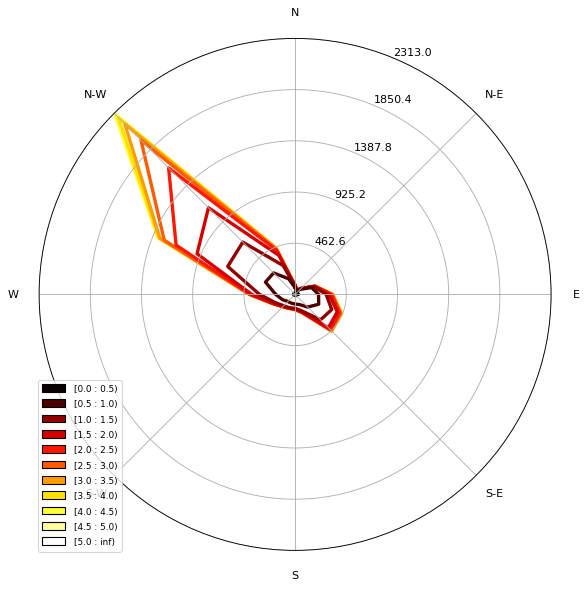

In [47]:
plot_windrose(df1, kind='contour', bins=np.arange(0.01, max(df1.speed), 0.5), cmap=cm.hot, lw=3, )